In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [14]:
path =  r'C:\Users\604572\Desktop\Sea Lion Counting\results\bbox_chips\adult_females\41_adult_females_1.png'

(80, 80, 3)

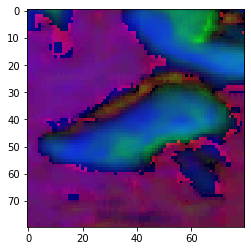

In [58]:
image_hsv = cv2.imread(path)
image_hsv = cv2.cvtColor(image_hsv, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)
image_hsv.shape
hsv_gray = cv2.cvtColor(image_hsv)

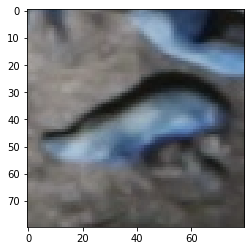

In [15]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image.shape
image_color = cv2.imread(path)
plt.imshow(image_color)

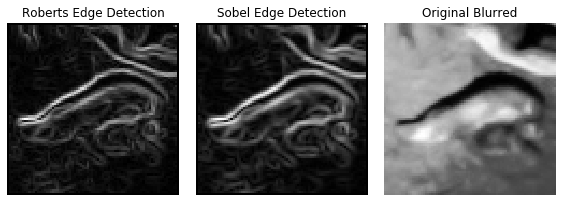

In [102]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (7,7),3,3)
#image = cv2.medianBlur(image, 3)
#print(image.shape)
image = cv2.bilateralFilter(image, 100,20,20)


edge_roberts = roberts(image)
edge_sobel = sobel(image)
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')
ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')
ax[2].imshow(image, cmap=plt.cm.gray)
ax[2].set_title('Original Blurred')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

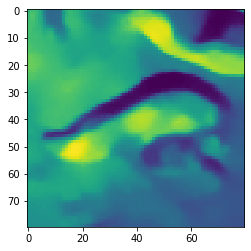

In [17]:
plt.imshow(image)

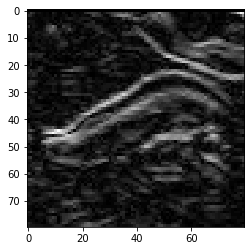

In [50]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
des = cv2.morphologyEx(image,cv2.MORPH_GRADIENT,(11,11))
plt.imshow(des,cmap=plt.cm.gray)

In [51]:
img = des.copy()

In [52]:
contours, _ = cv2.findContours(des, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
drawn_c = cv2.drawContours(img, contours, -1,(0,255,0),0)

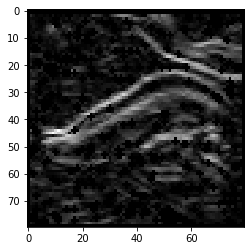

In [53]:
plt.imshow(drawn_c,cmap=plt.cm.gray)

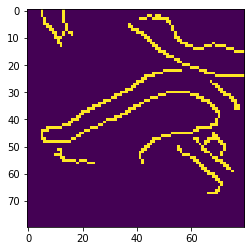

In [54]:
frame = cv2.imread(path)
image = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (5,5))
gray = cv2.bilateralFilter(gray, 11, 17, 17) #blur. very CPU intensive.
plt.imshow(gray)

edges = cv2.Canny(gray, 30, 120)

plt.imshow(edges)

#find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
# use RETR_EXTERNAL since we know the largest (external) contour will be the card edge.
cnts, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:1]
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.3 * peri, True)

    cv2.drawContours(img, [cnts[0]], -1, (0, 255, 0), 2)

    # if our approximated contour has four points, then
    # we can assume that we have found our card
    if len(approx) == 4:
        screenCnt = approx;
    break

In [55]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(image, kernel)
#cnts,_ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

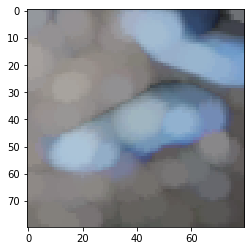

In [56]:
plt.imshow(dilated)

In [60]:
dilated_gray = cv2.cvtColor(dilated,cv2.COLOR_BGR2GRAY)

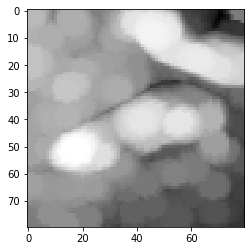

In [65]:
plt.imshow(dilated_gray,cmap=plt.cm.gray)


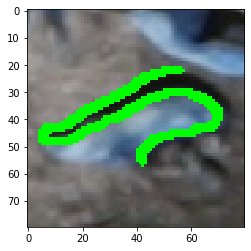

In [30]:
plt.imshow(cv2.drawContours(image, [cnts[0]], -1, (0, 255, 0), 2))

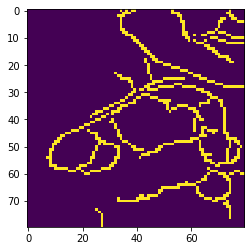

In [63]:
#cnts, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edges = cv2.Canny(dilated_gray, 30, 120)
plt.imshow(edges)

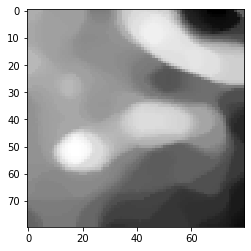

In [80]:
#further_gray = cv2.bilateralFilter(dilated_gray, 12, 0, 0) #blur. very CPU intensive.
further_gray = cv2.medianBlur(dilated_gray, 13)
plt.imshow(further_gray,cmap=plt.cm.gray)

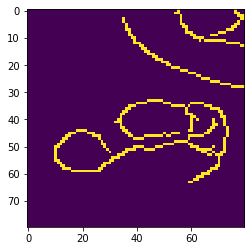

In [97]:
edges = cv2.Canny(further_gray, 20, 180)
plt.imshow(edges)

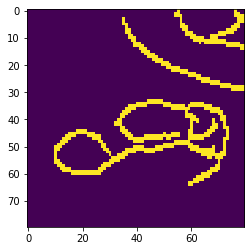

In [98]:
dilate_edges = cv2.dilate(edges.copy(),(9,9))
plt.imshow(dilate_edges)

In [99]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

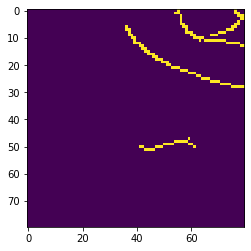

In [101]:
plt.imshow(auto_canny(further_gray))